# Import and normalize the cloud data

In [5]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import time

In [6]:
import urllib.request

# Download the file using urllib.request
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/taylor/cloud.data"
filename = "cloud.data"
urllib.request.urlretrieve(url, filename)

('cloud.data', <http.client.HTTPMessage at 0x1f6292c8bb0>)

In [7]:
cloud = []

with open('cloud.data') as fid:
  for aline in fid:
    aline = aline.strip().split()
    try:
      l = list(map(float,aline))
      if l:
        cloud.append(l)
    except: None

# convert to numpy array
cloud = np.array([np.array(i) for i in cloud])
cloud.shape

(2048, 10)

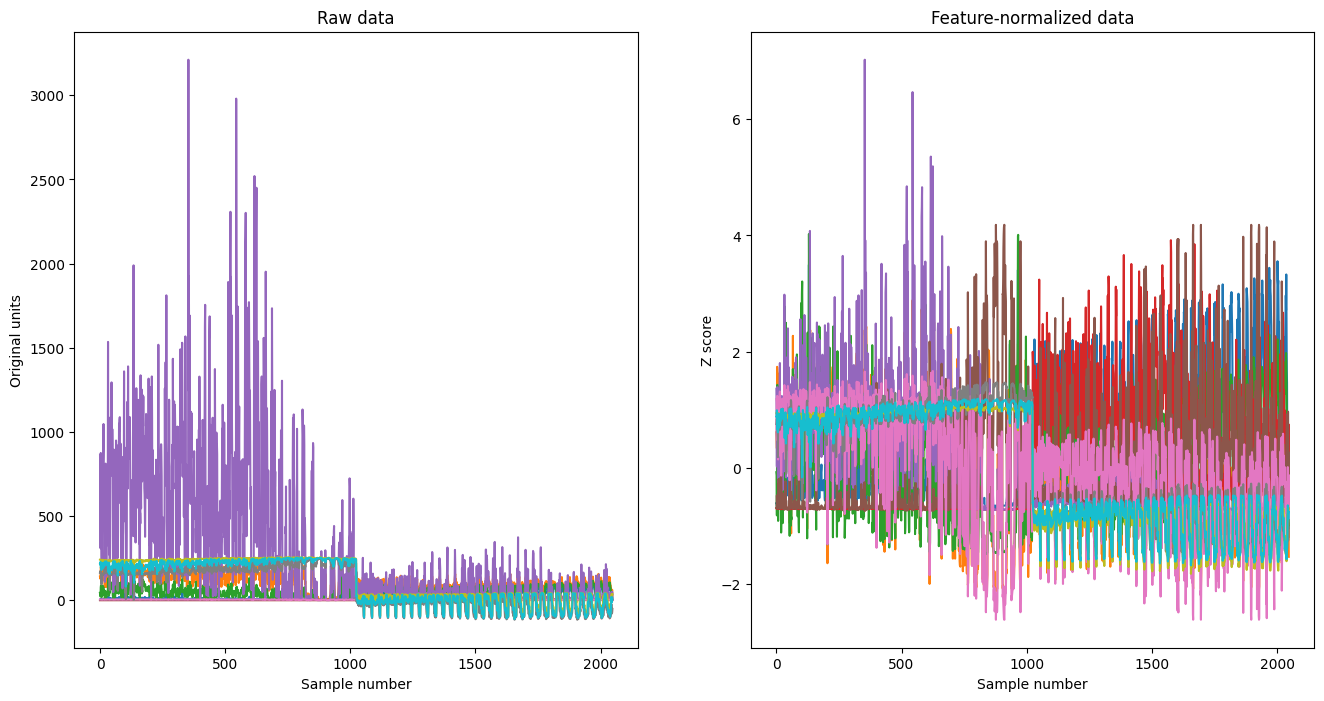

In [8]:
# z-normalize

cloudz = np.zeros(cloud.shape)

for coli in range(cloud.shape[1]):
  mean = np.mean(cloud[:,coli])
  std  = np.std(cloud[:,coli])
  cloudz[:,coli] = (cloud[:,coli]-mean)/std


fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(cloud)
ax[0].set_xlabel('Sample number')
ax[0].set_ylabel('Original units')
ax[0].set_title('Raw data')

ax[1].plot(cloudz)
ax[1].set_xlabel('Sample number')
ax[1].set_ylabel('Z score')
ax[1].set_title('Feature-normalized data')
plt.show()


# Compute and inspect covariance matrices

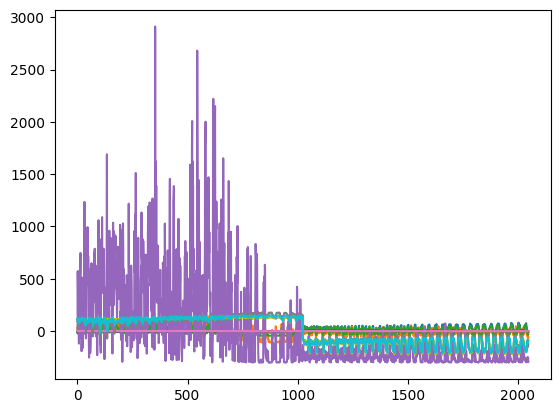

In [9]:
# mean-center and compute covariances (use broadcasting!)
cloud_demean = cloud - cloud.mean(axis=0)

plt.plot(cloud_demean)
plt.show()

In [10]:
cov_features  = cloud_demean.T@cloud_demean / cloud_demean.shape[0]
cov_featuresZ = cloudz.T@cloudz / cloud.shape[0]

# covariances for observations
cov_observations  = cloud_demean@cloud_demean.T   / cloud.shape[1]
cov_observationsZ = cloudz@cloudz.T / cloud.shape[1]


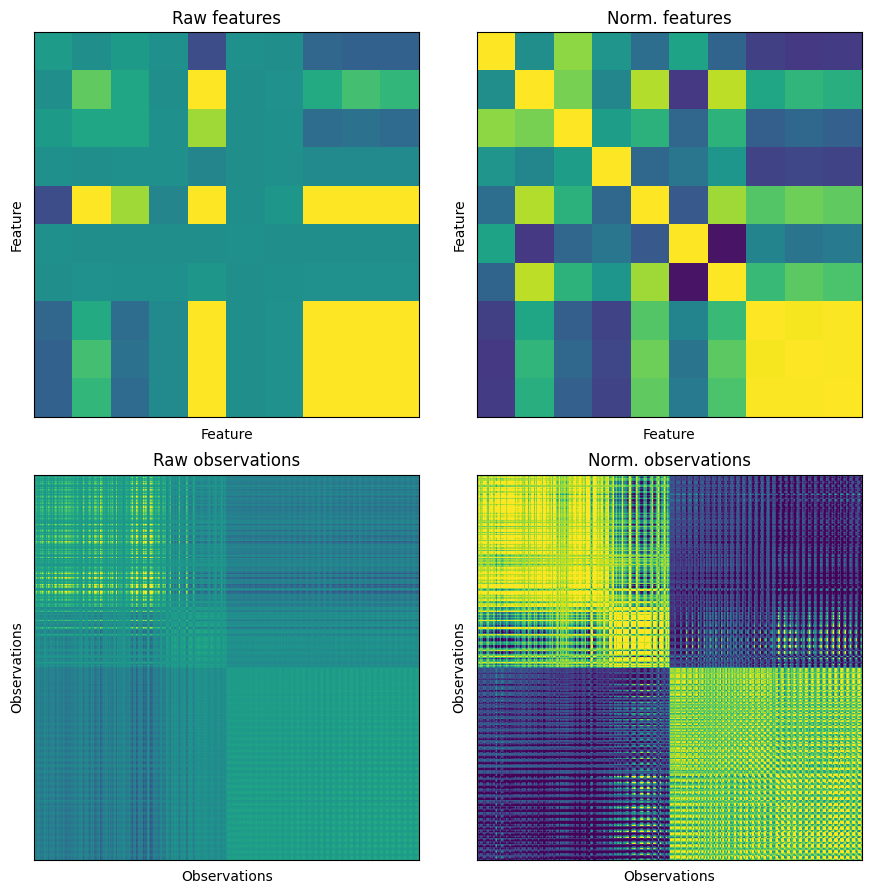

In [11]:
# show everything in plots

fig,ax = plt.subplots(2,2,figsize=(9,9))
fig.tight_layout()

# show the covariance matrix
ax[0,0].imshow(cov_features,vmin=-5000,vmax=5000)
ax[0,0].set_xlabel('Feature')
ax[0,0].set_ylabel('Feature')
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].set_title('Raw features')

ax[0,1].imshow(cov_featuresZ,vmin=-1,vmax=1)
ax[0,1].set_xlabel('Feature')
ax[0,1].set_ylabel('Feature')
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_title('Norm. features')


ax[1,0].imshow(cov_observations,
               vmin=-np.max(abs(cov_observations))*.1,vmax=np.max(abs(cov_observations))*.1)
ax[1,0].set_xlabel('Observations')
ax[1,0].set_ylabel('Observations')
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])
ax[1,0].set_title('Raw observations')

ax[1,1].imshow(cov_observationsZ,
               vmin=-np.max(abs(cov_observationsZ))*.1,vmax=np.max(abs(cov_observationsZ))*.1)
ax[1,1].set_xlabel('Observations')
ax[1,1].set_ylabel('Observations')
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,1].set_title('Norm. observations')

plt.show()

# Determine the number of components using PCA

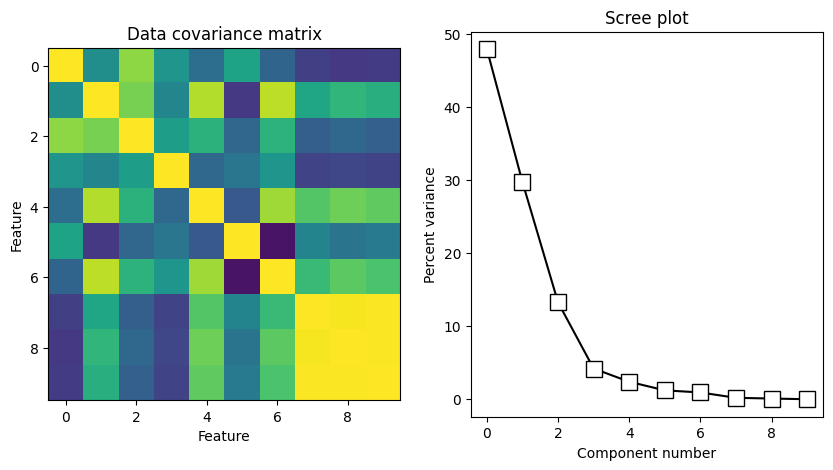

In [12]:
# run PCA
pca = PCA().fit(cloudz)

# setup a figure
fig,ax = plt.subplots(1,2,figsize=(10,5))

# show the covariance matrix
ax[0].imshow(pca.get_covariance(),vmin=-1,vmax=1)
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Feature')
ax[0].set_title('Data covariance matrix')

# show the scree plot
ax[1].plot(100*pca.explained_variance_ratio_,'ks-',markersize=12,markerfacecolor='w')
ax[1].set_xlabel('Component number')
ax[1].set_ylabel('Percent variance')
ax[1].set_title('Scree plot')
plt.show()


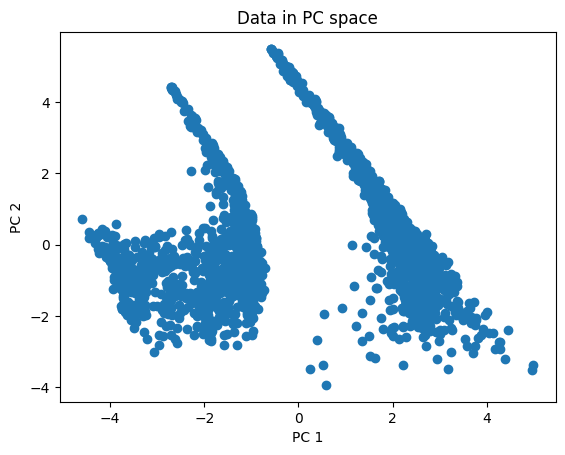

In [13]:
# apply transformation to get into PC space
cloud2D = pca.transform(cloudz)

# plot
plt.plot(cloud2D[:,0],cloud2D[:,1],'o')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Data in PC space')
plt.show()

# Cluster the data using t-SNE and k-means

C:\Users\SHRUTHI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SHRUTHI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


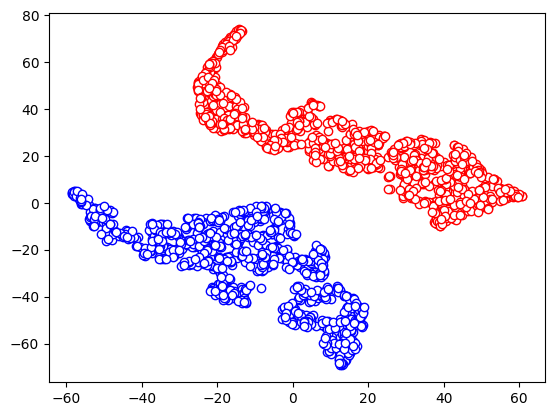

In [14]:
# run tSNE and plot
t = TSNE().fit_transform(cloudz)

# run k-means
clusters = KMeans(n_clusters=2).fit(t)

# plot the two clusters in different colors
plt.plot(t[clusters.labels_==0,0],t[clusters.labels_==0,1],'bo',markerfacecolor='w')
plt.plot(t[clusters.labels_==1,0],t[clusters.labels_==1,1],'ro',markerfacecolor='w')
plt.show()

C:\Users\SHRUTHI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SHRUTHI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\SHRUTHI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SHRUTHI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\SHRUTHI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SHRUTHI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py

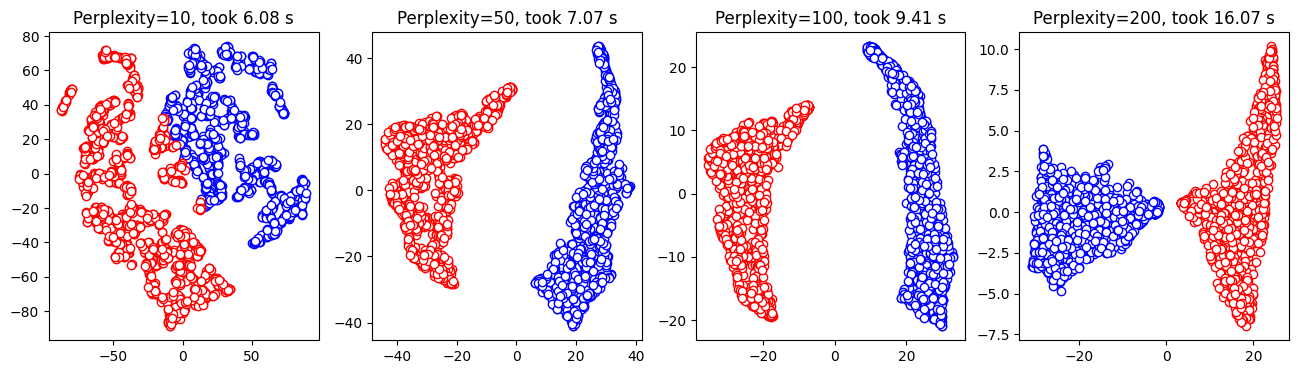

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import time

# Assuming 'cloudz' is your preprocessed data
perps = [10, 50, 100, 200]

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    starttime = time.time()
  
    # Run TSNE (try it with and without z-scoring)
    t = TSNE(perplexity=perps[i]).fit_transform(cloudz)
  
    # Extract clusters using k-means
    clusters = KMeans(n_clusters=2).fit(t)
  
    # Plot the two clusters in different colors
    ax[i].plot(t[clusters.labels_==0, 0], t[clusters.labels_==0, 1], 'bo', markerfacecolor='w')
    ax[i].plot(t[clusters.labels_==1, 0], t[clusters.labels_==1, 1], 'ro', markerfacecolor='w')
    ax[i].set_title('Perplexity=%s, took %.2f s' % (perps[i], time.time() - starttime))

plt.show()



In [18]:
print(f'Perplexity={perps[2]}, took {time.time() - starttime:.2f} seconds.')

Perplexity=100, took 62.45 seconds.


# Make a 2D likelihood density plot

C:\Users\SHRUTHI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SHRUTHI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


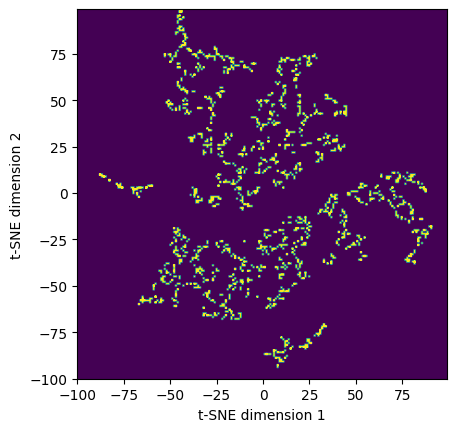

In [19]:
# re-run decomposition
t = TSNE(perplexity=10).fit_transform(cloudz)

# setup image (try again with limits=50)
trange = np.arange(-100,100)
timage = np.zeros((len(trange),len(trange)))

# population the image according to the data points
for i in range(len(t)):
  xi = np.argmin((t[i,0]-trange)**2)
  yi = np.argmin((t[i,1]-trange)**2)
  timage[yi,xi] += 1

# display and make it look nice
plt.imshow(timage,vmin=0,vmax=1,origin='lower',
           extent=[trange[0],trange[-1],trange[0],trange[-1]])
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')

# plt.plot(t[:,0],t[:,1],'w.',markersize=3) # confirmation...
plt.show()

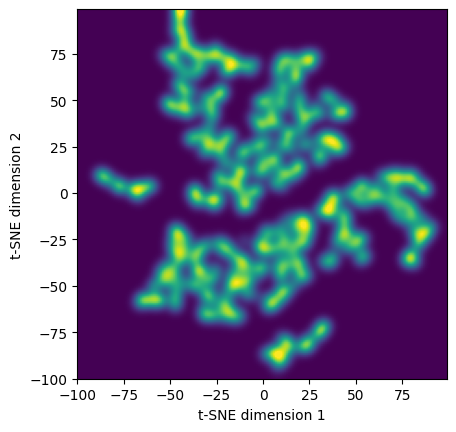

In [20]:
# smooth the image using the scipy.ndimage module
from scipy.ndimage import gaussian_filter

# run a Gaussian filter
timage_smooth = gaussian_filter(timage,sigma=(3,3))

# show the plot
plt.imshow(timage_smooth,vmin=0,vmax=.3,origin='lower',
           extent=[trange[0],trange[-1],trange[0],trange[-1]])
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()